Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel $\rightarrow$ Restart) and then **run all cells** (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Damilola Aladesuru"

<div class="alert alert-block alert-danger">

Total Points: 29/33 

Grade: 1.7

</div>

---

***
# Graded Assignment General Overview

During the course, we will have three graded assignments. In these three assignments, you will go through the entire Probabilistic Programming (PP) workflow we cover in the course. In the first assignment, we will start with the first three steps of the workflow; assignment two will cover steps 4 and 5, and assignment three will cover step 6:

|Assignment|Workflow Step|
|---|---|
|Assignment 1|1. Quantity to estimate|
|            |2. Scientific Model|
|            |3. Statistical Model|
|Assignment 2|4. Synthetic Data|
|            |5. Testing|
|Assignment 3|6. Real data|


__Background Paper__

You will implement the workflow for a specific research project. We will use an existing paper as a basis (see table). While the paper is important for background information, in most parts, the assignment will be based on the preregistration that belongs to the paper. A preregistration is a document that outlines the research question, survey design, and estimation approach before the actual experiment is conducted. The data used in the paper is also publicly available, but there is no need to download it now; this will be done within the assignments.

|Resource|Title|Link|
|-----------|---------|---------|
|Paper |Zachmann, L., McCallum, C., & Finger, R. (2023). Nudging farmers towards low‐pesticide practices: Evidence from a randomized experiment in viticulture. Journal of the Agricultural and Applied Economics Association, 2(3), 497-514.|[https://doi.org/10.1002/jaa2.76  ](https://doi.org/10.1002/jaa2.76  ) |
|Preregistration|Zachmann, L., McCallum, C., & Finger, R. 'Uptake of fungi-resistant grapevines: The effect of personalized vs general risk exposure information'. Pre-registered on 01/12/2022, AsPredicted #84972.| [https://aspredicted.org/fb2c9.pdf](https://aspredicted.org/fb2c9.pdf) |
|Open Data|Data on Swiss grapevine growers’ production, pest management and risk management decisions| [https://doi.org/10.3929/ethz-b-000568595  ](https://doi.org/10.3929/ethz-b-000568595  ) |

__Aim of the Assignments__ 

The paper does not use a PP workflow but uses frequentist estimation methods. We will rebuild the entire research process using the PP workflow and estimate the quantities of interest using Bayesian methods. The paper conducts a survey with farmers to gather the data required for answering the research question. This could be similar to what you could do for your master's thesis. By working on the assignment, you practice how the PP workflow can be implemented for an actual research project. Additionally, it prepares you for applying it to your own research project.    

*Heads up!* Be prepared that this will be quite a challenge and that for most of the questions there is not a single or clear-cut answer. Actually, an important learning outcome is that on the way to answering the research question, we need to make many (subjective) choices, and many alternative specifications or options would also be possible and justified. In terms of the grading, this means that the aim is not to find *one* correct answer (which does not exist) but rather to document and explain that you have thought about your choices and are aware of the implications.

*Good luck!*

***
<div class="alert alert-block alert-warning">
    <b>Technical hint to write equations</b>

To write equations within the notebook you can use Latex. If you are not familiar with Latex consider the existing equations as an example or [this](https://editor.codecogs.com/) or [this](https://www.cmor-faculty.rice.edu/~heinken/latex/symbols.pdf) webside might be useful. To render a Latex equation just place a Latex command between two dollar signs, e.g. $y_i \sim Normal(\mu,\sigma)$
If this does not work at all you could also prepare your solution on paper and then include it as an image in the notebook.

</div>
***
***


## Assingment 01:
1. Quantity to estimate
3. Scientific Model
4. Statistical Model

In [3]:
# Install required packaged (only need to be done once after each restart of the jupyter server)
#!pip install -q pandas matplotlib seaborn numpyro==0.15.2 jax==0.4.26 jaxlib==0.4.26 arviz networkx daft
!pip install -q pandas matplotlib seaborn numpyro==0.15.2 jax jaxlib arviz networkx daft
%conda install python-graphviz # install graphviz using conda (seems not to work with pip)
from IPython.display import clear_output
clear_output(wait=False) # clear all the output from conda
#can be usable in assignment to avoid extra output

In [4]:
# Required imports
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np
from graphviz import Digraph

***
<div class="alert alert-block alert-success">

__*Task 1*: Research question__ (3 Points)

</div>

Consider the [preregistration](https://aspredicted.org/fb2c9.pdf) write down how you understand the general and more specific reseach question of the paper:

***

YOUR ANSWER HERE

General: What is the effect of provision of personalized information about fungi risk exposure compared to general information?

Specific: Does the provision of farm-practice-tailored information cause grapevine growers to update their intentions about the uptake of fungi-resistant grapevines and the use of pesticides?


<div class="alert alert-block alert-danger">
Points: 3/3 (1 Point general + 2 Points, mention both personalized vs general))


</div>

***
<div class="alert alert-block alert-success">

__*Task 2*: Hypothesis__ (5 Points)

</div>


Consider the [preregistration](https://aspredicted.org/fb2c9.pdf) write down how you understand the two main hypothesis (in your own words). Try to be as preceise as possible. In case you find the hypothesis unclear/unprecise discuss what you find unclear and how you could refine the hypothesis to make it clearer. 

***    

YOUR ANSWER HERE

Hypothesis A: <br>
HA<sub>1</sub>: Compared to generalized information, provision of personalized information results in larger change in expected land devoted to fungi-resistant grapes in the future <br>
HA<sub>0</sub>: There is no difference in change in expected land devoted to fungi-resistant grapes in the future as a result of the provision of personalized information rather than generalized information <br>

Hypothesis B: <br>
HB<sub>1</sub>: Personalized information affects the uncertainty related to the land devoted to fungi-resistant grapevines<br>
HB<sub>0</sub>: Personalized information does not affect the uncertainty related to the land devoted to fungi-resistant grapevines<br>

***

<div class="alert alert-block alert-danger">
Points: 3/5 (2 Points for each hypothesis, 1 Point discussing imprecision)) 

Feedback: Hypothesis B is the same as in the pre-registration. However, this hypothesis can be more precise by specifying the direction of the change in uncertainty. This imprecision is not discussed. More precisely, we could say: "Because personalized information is more relevant for the farmer, personalized information reduces the uncertainty of the intention more than general information."
</div>

__Background information for the next task__

<div class="alert alert-block alert-warning">
<b>Background Information: Triangular distribution</b>

The paper uses a triangular share distribution. Consider the following mathematical formulas and the code cell belwo to explore the triangular share distribution.

The triangular distribution *pdf* (see [Hardaker et al., 2015](https://d1wqtxts1xzle7.cloudfront.net/56939027/Coping-With-Risk-in-Agriculture-libre.pdf?1530860172=&response-content-disposition=inline%3B+filename%3DCoping_With_Risk_in_Agriculture_J_Brian.pdf&Expires=1723204042&Signature=Vw8vdVH5bz0JxNXLqrljFmG3wnraElVmucVyx19l-BWjD8mTUDMXRDZhFoSMSIujIb0ky5BUvVXK1m-3VIidRWLVUeRI7oIVa3656L~2gt91uWMkJz0cnI3JeYNAOmXcPSPPsxwoIpuy8TGCauGg1x5JZKb3-sMlVCHwegV~J5siYbNizsXet356Zj8wXJsCK0gKIo-1eoHCpSr-~N928tdnU44jOZAPwPQna4RvDbFBZD30EDJAFCRggAOBHQXaZMbvf~vjSh0cr9rjMpxAL8XyMciOBj-JCG8Za8uvXCPStHDqGa0~~T0RtRI9Y85Ml0CEZ0A6ByQ-vgFLsGwjSQ__&Key-Pair-Id=APKAJLOHF5GGSLRBV4ZA), p. 45)

$ f(x) = 0, x\leq a $

$ f(x) = 2(x-a)/(b-a)(m-a), x\leq m $

$ f(x) = 2(b-x)/(b-a)(b-m), x>m $

$ f(x) = 0, b\leq x $

The triangular distribution *expected value*, *var*, *std* (see Appendix E or [wikipedia](https://en.wikipedia.org/wiki/Triangular_distribution))

$E = (a+b+c)/3 $

$Var = \frac{a^2+b^2+c^2-ab-ac-bc}{18}$

$Std = \sqrt{Var} = \sqrt{\frac{a^2+b^2+c^2-ab-ac-bc}{18}}$
</div>

In [4]:
# Run this cell for an illustration of the triangular distribution
def ptriangular(x,a,b,m):
    """
    a = minimum
    b = maxiumum
    m = most likely
    """
    if x<=m:
        pdf = 2*(x-a)/((b-a)*(m-a))
    else:
        pdf = 2*(b-x)/((b-a)*(b-m))
    if x<a:
        pdf=0
    if b<x:
        pdf=0
    return pdf

def plot_ptriangular(a=0.,b=1,m=0.5):
    if a>=b:
        print("a need to be smaller then b")
        return
    if (m<=a) |(m>=b):
        print("m needs to be between a and b")
        return
    
    plt.figure(1, figsize=(3,3))
    x_range = np.arange(0,1,0.1)
    # Plot pdf
    pdf = [ptriangular(x,a,b,m) for x in x_range]
    plt.plot(x_range,pdf)
    # Add expected value
    expected_value = (a+b+m)/3
    plt.axvline(x=expected_value, color='black',linestyle='dashed',)
    plt.text(expected_value+0.01,0,'E(X)') 
    # Add variance
    std_value =np.sqrt((a**2+b**2+m**2-a*b-a*m-b*m)/18)
    plt.text(0,np.max(pdf)*0.95,f'Std(X)={std_value:.4f}') 

# interactive_plot = interactive(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))
interactive_plot = interactive(plot_ptriangular, a=(0,1,0.1), b = (0,1,0.1), m = (0,1,0.1))
output = interactive_plot.children[-1]
#output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='a', max=1.0), FloatSlider(value=1.0, description='b'…

***
<div class="alert alert-block alert-success">

__*Task 3*: Scientific Model Praperation__ (9 Points)

</div>

Define a scientific model, based on the information provided in the [preregistration](https://aspredicted.org/fb2c9.pdf]) or your own understanding of the problem

***

3a) Define the two outcome variable $Y_1$ and $Y_2$ for the two hypothesis. For each define them verbaly and in terms of the triangular distribution. (4 Point)

HA compares "change in expected land devoted to fungi-resistant grapes in the future (10 years)" based on treatments: general information (G) or personalized information (P)

$S_i$ = expected land devoted to fungi-resistant grapes in 10 years <br>
E[$S_i$] = average $S_i$

Therefore, for HA, we need to compute change in E[$S_i$] and compare this between group to see the difference in treatment effects. <br>
According to triangular distribution, mean of pdf i.e E[$S_i$] is = (a+b+m)/3.   <br>
Thus,  our outcome variable, change in average expected land devoted to fungi-resistant grapes in the 10 years associated with information type ($Y_1$ or ∆E[$S_i$]) can be computed as follows:

If $S_i1$ refers to $S_i$ before treatment and $S_i2$ refers to $S_i$ after treatment, then our magnitude of change associated with information type (∆E[$S_i$]) = difference between before and after values between groups i.e., <br>
1) for each experimental group, we compute ∆E[$S_i$] = E[$S_i2$] - E[$S_i1$] = (($a_2$+$b_2$+$m_2$)/3) - (($a_1$+$b_1$+$m_1$)/3) <br>
2) we estimate treatment effect i.e., difference between treatment group values and control group <br>
3) then we further examine the difference between values obtained between treatment groups; ∆E[$S_i$] = ∆E[$S_i$]_P - ∆E[$S_i$]_G. This difference should be approximately zero if personalized information does not change the expected devoted land compared to generalized information.

HB examines change in uncertainty (variance) based on treatments P and G. Using triangular distribution variance $((a^2+b^2+m^2-a*b-a*m-b*m)/18)$, we would like to know 1) the difference between the variance of obtained posterior and prior values within groups and then 2) examine how this difference compares between treatment groups i.e., 

$Y_2$ or ∆V[$S_i$] associated with P = ∆V[$S_i$]_P - ∆V[$S_i$]_G

We can however, easily accomplish all of the above with:<br>
∆E[$S_i$]=α+$β_1$ $P_i$+$β_2$ $G_i$+θX+$ε_i$ <br>
∆V[$S_i$]=α+$β_1$ $P_i$+$β_2$ $G_i$+θX+$ε_i$

$P_i$ and $G_i$ are dummy equal to 1 if the participant received personal or general information, respectively, and 0 otherwise. <br>
$β_1$ and $β_2$ show the additional change in expected devoted land based on the treatments. $β_1$ larger than $β_2$ implies larger change attributable to personalized information. <br>
X is a vector of farmer-, farm- and location-specific control variables.

***

3b) Define the two treatment variables considered in the study (2 points)

The two treatment variables considered are: 1) provision of general information (G) and 2) personalized information (P)


***

3c) Explain the experimental setup (in terms of who receives treatment) (3 points)

We have two treatment groups (TG) and one control group in the experimental setup. <br>
(TGi) personalized information: receive the general information plus the number of highly environmentally toxic fungicides they used in the last growing season based on their answers to earlier questions in the survey. <br>
(TGii) General information: receives general information about the number of highly environmentally toxic fungicides approved in grapevine growing in Switzerland. <br>
The control group receives no information

***

<div class="alert alert-block alert-danger">

a) Points: 4/4 (for each of the two outcome variables: 1 point for verbal, 1 point for formula)

b) Points: 2/2 (1 point for each variable)

c) Points: 3/3 (1 point for mentioning each of the 3 treatment groups)

Feedback: Perfect    
</div>

***
<div class="alert alert-block alert-success">

__*Task 4*: Scientific Model DAG__ (6 Points)

</div>


Using the notation you introduced above draw a DAG of the scientific model outline in the preregistration.

*Note: To make things easier ignore the dependence of the Xs (i.e. farmer-, farm- and location-specific control variables) on the outcomes. We will get back to this issues at a later state!*

***

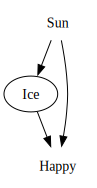

In [5]:
# Example using graphviz Digraph https://graphviz.readthedocs.io/en/stable/examples.html
dot = Digraph()
dot.node('I', 'Ice')
dot.attr('node', style='filled', color='white') # Set color to white to indicate observed/unobserved variables
dot.node('H', 'Happy')
dot.node('S', 'Sun')
dot.edges([('S','H'),('I','H'),('S','I')])
dot 


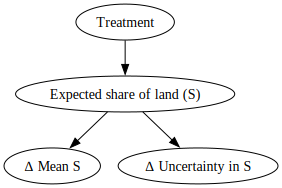

In [5]:
dot = Digraph()
dot.node('T', 'Treatment')
dot.node('S', 'Expected share of land (S)')
dot.node('ES', '∆ Mean S')
dot.node('VS', '∆ Uncertainty in S')
dot.edges([('T','S'), ('S', 'ES'), ('S', 'VS')])
dot 


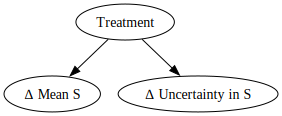

In [6]:
dot = Digraph()
dot.node('T', 'Treatment')
dot.node('ES', '∆ Mean S')
dot.node('VS', '∆ Uncertainty in S')
dot.edges([('T', 'ES'), ('T', 'VS')])
dot 


<div class="alert alert-block alert-danger">

Points: 6/6 (4 Points for using sensible nodes, 2 points for sensible edges)

</div>

***

<div class="alert alert-block alert-success">

__*Task 5*: Generative Statistical model__ (6 Points)

</div>

Using the notation of the variables above to define a generative model that fits to your DAG. Note as we have two outcome variables (for the two hypothesis) we basically need two differnce generative models.

*For example for a simple linear regression this could look like*

$ y_i \sim Normal(\mu_i,\sigma) $

$ \mu_i = \beta_0 + beta_1 X_{1 i} + beta_2 X_{2 i} $

$ \beta_j \sim Normal(0,1) $ for $j=0,1,2$

$ \sigma \sim Exponential(1)$

*Consider the other examples in the lecture or the book. Importantly, adjust and define all the variables/symbols you are using, if not already done above*

***

HA:

$∆E[S_i] \sim Normal(\mu_i,\sigma)$

$\mu_i = \alpha + \beta_1 P_i + \beta_2 G_i + \theta X$

$\alpha \sim Normal(0,0.5)$

$ \beta_j \sim Normal(0,1) $ for $j=1,2$

$\theta \sim Normal(0,0.1)$

$\sigma \sim Exponential(1)$

where α, β1, and β2 represent a change in mean $S_i$ for the control group, additional change attributable to treatment P, and additional change attributable to treatment G, respectively.

HB:

$∆V[S_i] \sim Normal(\mu_i,\sigma)$

$\mu_i = \alpha + \beta_1 P_i + \beta_2 G_i + \theta X$

$\alpha \sim Normal(0,0.5)$

$ \beta_j \sim Normal(0,0.1) $ for $j=1,2$

$\theta \sim Normal(0,0.1)$

$\sigma \sim Exponential(1)$

where α, β1, and β2 represent a change in variance in $S_i$ for the control group, additional change attributable to treatment P, and additional change attributable to treatment G, respectively.


<div class="alert alert-block alert-danger">

Points: 5/6 (3 points per outcome variable, 1 point for defining a complete model sufficient to sample from, 1 point alignment with DAG, 1 point correct math notation)

Feedback: Correct; for a clearer notation, it would make sense to use different symbols for the coefficients in the two models. If we read the model literally, it would imply that we have the same $\alpha$, $\beta_1$, and $\beta_2$ in both models. For alignment with DAG we could have considered $P$ and $G$ in the DAG, instead of just "treatment". Additionally, $X$ is not considered in DAG but in the statistical model. 

</div>

***

<div class="alert alert-block alert-success">

__*Task 6*: Define exactly how you could test the two hypothesis from above in terms of your statistical model (4 points)__

*Example*

In notebook_01 our hypothesis was "Soil quality has a positive effect on yield"

In terms of our model we could test this hypothesis by testing if  $\beta > 0$


</div>

***
Hypothesis A:   
HA<sub>1</sub>: Compared to generalized information, provision of personalized information results in larger change in expected land devoted to fungi-resistant grapes in the future   
HA<sub>0</sub>: There is no difference in change in expected land devoted to fungi-resistant grapes in the future as a result of the provision of personalized information rather than generalized information

Hypothesis B:   
HB<sub>1</sub>: Personalized information changes the uncertainty related to the land devoted to fungi-resistant grapevines   
HB<sub>0</sub>: Personalized information does not change the uncertainty related to the land devoted to fungi-resistant grapevines


$β_1$ and $β_2$ show the additional change in mean (HA) expected devoted land and uncertainty (HB) based on the treatments. $β_1$ larger than $β_2$ implies larger change attributable to personalized information. <br>

***

<div class="alert alert-block alert-danger">

Points: 3/4 (2 points per Hypothesis. 1 point for correct notation i.e. alignment with stats model, 1 point for alignment with hypothesis above)

Feedback: Mostly correct, but the answer could be more precise. First, having $\alpha$, $\beta_1$, and $\beta_2$ in both models makes precise definition difficult. Additionally, if we defined hypothesis B without a direction, as "Personalized information changes the uncertainty related to the land devoted to fungi-resistant grapevine" then a precise test would only require to test if $\beta_1 \neq 0$ 


</div>